In [45]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
print(mnist)

{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [46]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


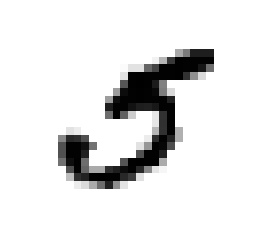

In [47]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [48]:
# Print label of image

print(y[36000])

5.0


In [49]:
# Dataset is already split into test and training

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [50]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [51]:
# Train a binary classifier (true for 5, false for not 5)

y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42, max_iter=5)
sgd_clf.fit(X_train, y_train_5)

print(sgd_clf.predict([some_digit]))

[False]


In [52]:
# Evaluate performance

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9676
0.9566
0.96775


In [53]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy"))

[0.9676  0.9566  0.96775]


In [54]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    
never_5_clf = Never5Classifier()
print(cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy"))


[0.91065 0.90925 0.90905]


In [55]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53903,   676],
       [ 1485,  3936]])

In [57]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

[-2894.71371498]


In [58]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [59]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [60]:
# Precision and recall

from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_train_5, y_train_pred)
print(precision)

0.8534258456201215


In [61]:
recall = recall_score(y_train_5, y_train_pred)
print(recall)

0.7260653016048699


In [62]:
# f1 score is combination of precision and recall; is the harmonic mean of these two
# Harmonic mean: Gives more weight to low values. 
# This means f1 score will only be high if both precision and recall are high.

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7846107844114423

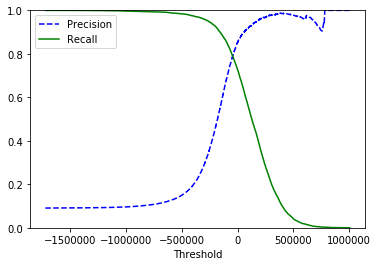

In [63]:
# Note: There is a tradeoff between precision and recall. Higher precision means lower recall and vice-versa.

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [64]:
y_train_pred_90 = (y_scores > 70000)
precision = precision_score(y_train_5, y_train_pred_90)
print(precision)

0.9090150250417363


In [66]:
recall = recall_score(y_train_5, y_train_pred_90)
print(recall)

0.6026563364692861
